In [1]:
import os
os.getcwd()

'c:\\aaa'

In [2]:
# Importing necessary libraries

# Building deep learning models
import tensorflow as tf 
from tensorflow import keras 
# For accessing pre-trained models

# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import numpy as np
import pathlib

from keras.preprocessing import image
from tensorflow.keras import layers, models
import tensorflow as tf
import keras
import numpy as np
import matplotlib.cm as cm
import cv2
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
import os 
import cv2
import numpy as np 

path="C:\\aaa\\trainn\\"
folderNames=os.listdir(path)
XSample,ySample=[],[]
for i,folderName in enumerate(folderNames):
    for j,file in enumerate([f for f in os.listdir(path+folderName) if os.path.isfile(os.path.join(path+folderName, f))]):
        img=cv2.resize(cv2.imread(path+folderName+"\\"+file),(128,128),interpolation=cv2.INTER_LINEAR)/255
        XSample.append(np.asarray(img))
        ySample.append(i)
XSample=np.array(XSample)
ySample=np.array(ySample)
print(XSample.shape)
print(ySample.shape)


(1800, 128, 128, 3)
(1800,)


In [4]:
from sklearn.model_selection import train_test_split
# validationu  xtrainden bölüyoruz
XTrain,XTest,yTrain,yTest = train_test_split(XSample,ySample,test_size=0.10,random_state=0)
XTrain,XVal,yTrain,yVal=train_test_split(XTrain,yTrain,test_size=0.111,random_state=0)
print(XTrain.shape)
print(XTest.shape)
print(XVal.shape)

(1440, 128, 128, 3)
(180, 128, 128, 3)
(180, 128, 128, 3)


In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
model=models.Sequential()

model.add(layers.Conv2D(64,(3,3), activation='relu',input_shape=(128,128,3)))# !128 64 lük iyi sonuc 
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(32,(3,3), activation='relu'))# !64 32 en iyi
# model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(16,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(16,(3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid')) # 1 olucak

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])# multi class oldugu için binary entropy aldık

# history= model.fit(XTrain,yTrain, epochs=20,
#                    validation_data=(XVal, yVal))

history=model.fit(XTrain,yTrain,batch_size=100,validation_data=(XVal,yVal),epochs=20)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0

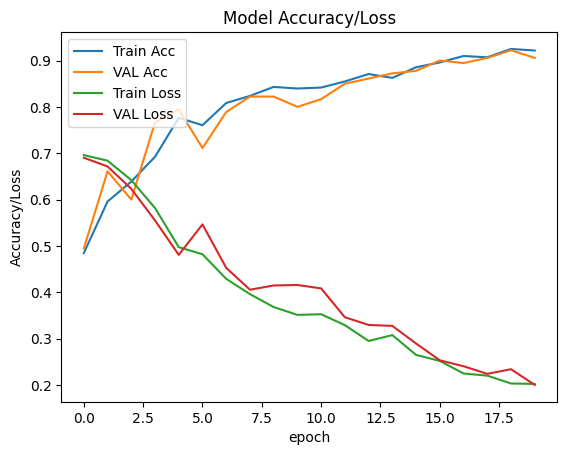

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Accuracy/Loss")
plt.ylabel("Accuracy/Loss")
plt.xlabel("epoch")
plt.legend(["Train Acc",    "VAL Acc", "Train Loss",   "VAL Loss"],loc="upper left")
plt.show()


6/6 [==============================] - 3s 383ms/step
[0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0
 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0
 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.99      0.85      0.91        94
           1       0.86      0.99      0.92        86

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.93      0.92      0.92       180



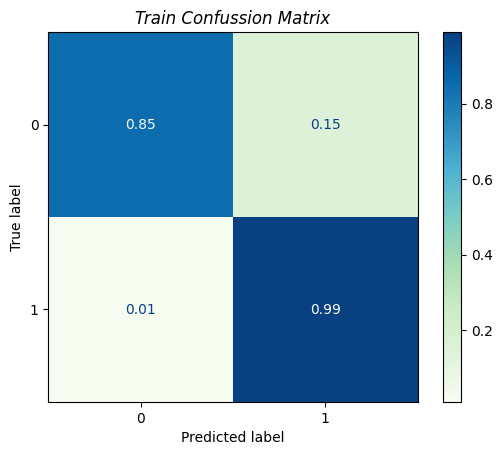

In [7]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# yTestPred=np.argmax(yTestPred, axis=1) argmax kukllanmıyoruz çünkü amacı multi olan durumda en yüksek değerli sınıfı alır.
yTestPred=np.asarray(np.round(model.predict(XTest),0),dtype=int)  # çok önemli 
print(yTestPred.reshape(yTestPred.shape[0]))  #  cok önemli

yTest=np.asarray(yTest)
print(classification_report(yTest,yTestPred))
cm=confusion_matrix(yTest,yTestPred, normalize="true").round(2)

disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp=disp.plot(cmap=plt.cm.GnBu, values_format='g')
plt.title(f"Train Confussion Matrix", style="italic")
plt.show()